In [1]:
from google.colab import drive
import os
import pandas as pd

In [2]:
drive.mount('/content/drive')

drive = "/content/drive/MyDrive/College/UIDAI_hackathon/api_data_aadhar_demographic"

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv(os.path.join(drive,"api_data_aadhar_demographic_0_500000.csv"))
df2 = pd.read_csv(os.path.join(drive,"api_data_aadhar_demographic_500000_1000000.csv"))
df3 = pd.read_csv(os.path.join(drive,"api_data_aadhar_demographic_1000000_1500000.csv"))
df4 = pd.read_csv(os.path.join(drive,"api_data_aadhar_demographic_1500000_2000000.csv"))
df5 = pd.read_csv(os.path.join(drive,"api_data_aadhar_demographic_2000000_2071700.csv"))

final_df = pd.concat([df1,df2,df3,df4,df5], axis=0, ignore_index=True)

# final_df.to_csv(os.path.join(drive,"final_data.csv"), index=False)
final_df.to_csv("final_data.csv", index=False)

In [ ]:
final_df["state_clean"] = (
    final_df["state"]
    .astype(str)
    .str.strip()          # remove extra spaces
    .str.replace(r"\s+", " ", regex=True)  # fix double spaces
    .str.title()          # consistent capitalization
)

In [ ]:
final_df['state_clean'] = final_df['state_clean'].replace({
    "100000":"Lakshadweep",
    "Andaman & Nicobar Islands":"Andaman And Nicobar Islands",
    "Dadra & Nagar Haveli": "Dadra And Nagar Haveli",
    "Daman & Diu": "Daman And Diu",
    "Jammu & Kashmir": "Jammu And Kashmir",
    "Orissa": "Odisha",
    "Pondicherry":"Puducherry",
    "The Dadra And Nagar Haveli And Daman And Diu" : "Dadra And Nagar Haveli And Daman And Diu",
    "West Bangal": "West Bengal",
    "Westbengal": "West Bengal",
    "West Bengli": "West Bengal",
    "Tamilnadu": "Tamil Nadu",
    "Chhatisgarh": "Chhattisgarh",
    "Uttaranchal": "Uttarakhand",
    'Jaipur': 'Rajasthan',
    'Nagpur': 'Maharashtra',
    'Darbhanga': 'Bihar',
    'Madanapalle': 'Andhra Pradesh',
    'Puttenahalli': 'Karnataka',
    'Balanagar': 'Telangana',
    'Raja Annamalai Puram': 'Tamil Nadu',
})


In [ ]:
len(final_df['state_clean'].unique())

38

In [ ]:
final_df["district_clean"] = (
    final_df["district"]
    .astype(str)
    .str.strip()
    .str.replace(r"[–—]", "-", regex=True)
    .str.replace(r"\s+", " ", regex=True)
    .str.replace(r"[^\w\s\-\(\)]", "", regex=True)
    .str.title()
)

In [ ]:
final_df['district_clean'] = final_df['district_clean'].replace({
    # --- Official Renaming ---
    'Allahabad': 'Prayagraj',
    'Faizabad': 'Ayodhya',
    'Gurgaon': 'Gurugram',
    'Mewat': 'Nuh',
    'Aurangabad': 'Chhatrapati Sambhajinagar',
    'Aurangabad(Bh)': 'Aurangabad', # Distinguishing Bihar's Aurangabad
    'Chatrapati Sambhaji Nagar': 'Chhatrapati Sambhajinagar',
    'Osmanabad': 'Dharashiv',
    'Ahmednagar': 'Ahilyanagar',
    'Ahmadnagar': 'Ahilyanagar',
    'Ahmed Nagar': 'Ahilyanagar',

    # --- Karnataka (Anglicized -> Local) ---
    'Bangalore': 'Bengaluru',
    'Bangalore Rural': 'Bengaluru Rural',
    'Belgaum': 'Belagavi',
    'Bellary': 'Ballari',
    'Bijapur': 'Vijayapura',
    'Bijapur(Kar)': 'Vijayapura',
    'Chikmagalur': 'Chikkamagaluru',
    'Chickmagalur': 'Chikkamagaluru',
    'Gulbarga': 'Kalaburagi',
    'Hospet': 'Vijayanagara',
    'Hubli': 'Hubballi',
    'Mysore': 'Mysuru',
    'Shimoga': 'Shivamogga',
    'Tumkur': 'Tumakuru',

    # --- Spelling/Transliteration Variations ---
    'Ahmadabad': 'Ahmedabad',
    'Baleshwar': 'Balasore', # Or Baleswar, depending on preference
    'Baleswar': 'Balasore',
    'Barddhaman': 'Bardhaman',
    'Burdwan': 'Bardhaman',
    'Baramula': 'Baramulla',
    'Bulandshahar': 'Bulandshahr',
    'Chittaurgarh': 'Chittorgarh',
    'Dantewada': 'Dakshin Bastar Dantewada',
    'Dohad': 'Dahod',
    'Gondiya': 'Gondia',
    'Gondiya ': 'Gondia', # Trailing space handling
    'Hardwar': 'Haridwar',
    'Howrah': 'Haora', # Official census often uses Haora, but Howrah is common
    'Hawrah': 'Haora',
    'Hugli': 'Hooghly',
    'Jajapur': 'Jajpur',
    'Jalo': 'Jalore',
    'Jalor': 'Jalore',
    'Kancheepuram': 'Kanchipuram',
    'Keri': 'Kheri', # Assuming Lakhimpur Kheri
    'Khordha': 'Khorda',
    'Mahabub Nagar': 'Mahabubnagar',
    'Mahbubnagar': 'Mahabubnagar',
    'Medinipur': 'Paschim Medinipur', # Note: Medinipur was split, usually requires context
    'Midnapore': 'Paschim Medinipur',
    'Nabarangapur': 'Nabarangpur',
    'Narsimhapur': 'Narsinghpur',
    'Nasik': 'Nashik',
    'Pondicherry': 'Puducherry',
    'Poona': 'Pune',
    'Purulia': 'Puruliya',
    'Rangareddi': 'Rangareddy',
    'Sipahijala': 'Sepahijala',
    'Sundergarh': 'Sundargarh',
    'Thiruvallur': 'Tiruvallur',
    'Tuticorin': 'Thoothukkudi',
    'Visakhapatanam': 'Visakhapatnam',
    'Y S R': 'YSR Kadapa',
    'Cuddapah': 'YSR Kadapa'
})

In [ ]:
duplicate_rows = final_df[final_df.duplicated(keep=False)]
print(duplicate_rows)
print(len(duplicate_rows))
final_df.duplicated().sum()


final_df["is_duplicate"] = final_df.duplicated(keep="first").astype(int)


final_df["is_duplicate"].value_counts()

               date           state  district  pincode  demo_age_5_17  \
113325   18-10-2025       Karnataka  Belagavi   591313              0   
113326   18-10-2025       Karnataka  Belagavi   591315              0   
113327   18-10-2025       Karnataka  Belagavi   591316              0   
113328   18-10-2025       Karnataka   Belgaum   590009              0   
113329   18-10-2025       Karnataka   Belgaum   591101              1   
...             ...             ...       ...      ...            ...   
2069815  29-12-2025  Andhra Pradesh  Cuddapah   516004              0   
2069816  29-12-2025  Andhra Pradesh  Cuddapah   516151              0   
2069817  29-12-2025  Andhra Pradesh  Cuddapah   516173              0   
2069818  29-12-2025  Andhra Pradesh  Cuddapah   516175              1   
2069819  29-12-2025  Andhra Pradesh  Cuddapah   516218              0   

         demo_age_17_     state_clean district_clean  
113325              1       Karnataka       Belagavi  
113326       

,count
is_duplicate,
0,1598099
1,473601


In [ ]:
final_df.to_csv("final_data.csv", index=False)
final_df.to_csv(os.path.join(drive,"final_data.csv"), index=False)

------- check point -------

In [3]:
final_df = pd.read_csv(os.path.join(drive,"final_data.csv"))
final_df = final_df.query("is_duplicate == 0")

In [ ]:
final_df

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_clean,district_clean,is_duplicate
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529,Uttar Pradesh,Gorakhpur,0
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375,Andhra Pradesh,Chittoor,0
2,01-03-2025,Gujarat,Rajkot,360006,65,765,Gujarat,Rajkot,0
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314,Andhra Pradesh,Srikakulam,0
4,01-03-2025,Rajasthan,Udaipur,313801,45,785,Rajasthan,Udaipur,0
...,...,...,...,...,...,...,...,...,...
2071695,29-12-2025,West Bengal,West Midnapore,721212,0,12,West Bengal,West Midnapore,0
2071696,29-12-2025,West Bengal,West Midnapore,721420,0,1,West Bengal,West Midnapore,0
2071697,29-12-2025,West Bengal,West Midnapore,721424,0,5,West Bengal,West Midnapore,0
2071698,29-12-2025,West Bengal,West Midnapore,721426,0,3,West Bengal,West Midnapore,0


##Stats vs updates

/tmp/ipython-input-3279086190.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='updates', y='state_clean', data=df_sorted, palette='viridis')


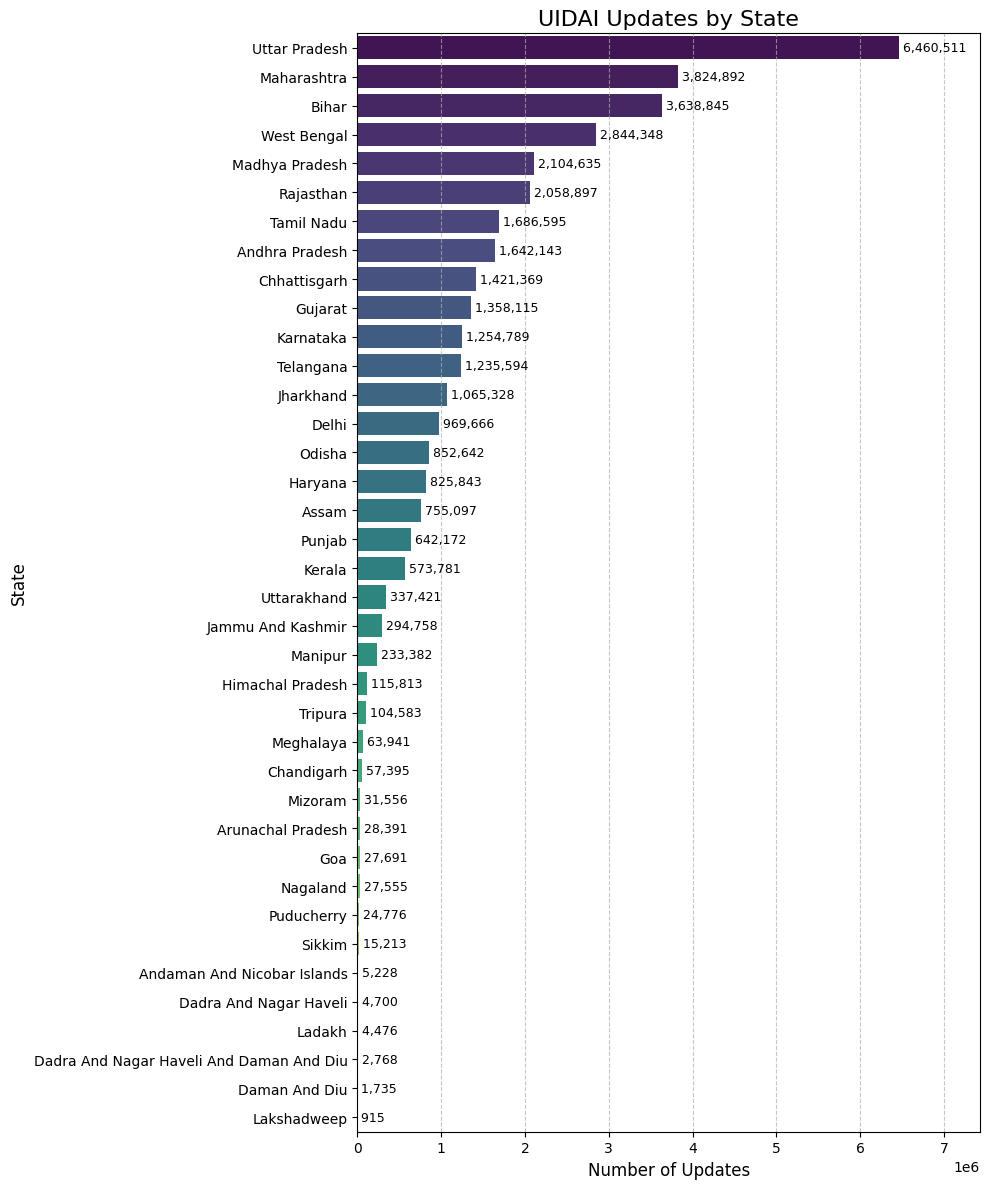

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

final_df['updates'] = final_df['demo_age_5_17'] + final_df['demo_age_17_']
df_sorted = final_df.groupby('state_clean')['updates'].sum().reset_index().sort_values('updates', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(x='updates', y='state_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Updates by State', fontsize=16)
plt.xlabel('Number of Updates', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['updates']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['updates'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

## state vs updates (age 5-17)

/tmp/ipython-input-1594384446.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='demo_age_5_17', y='state_clean', data=df_sorted, palette='viridis')


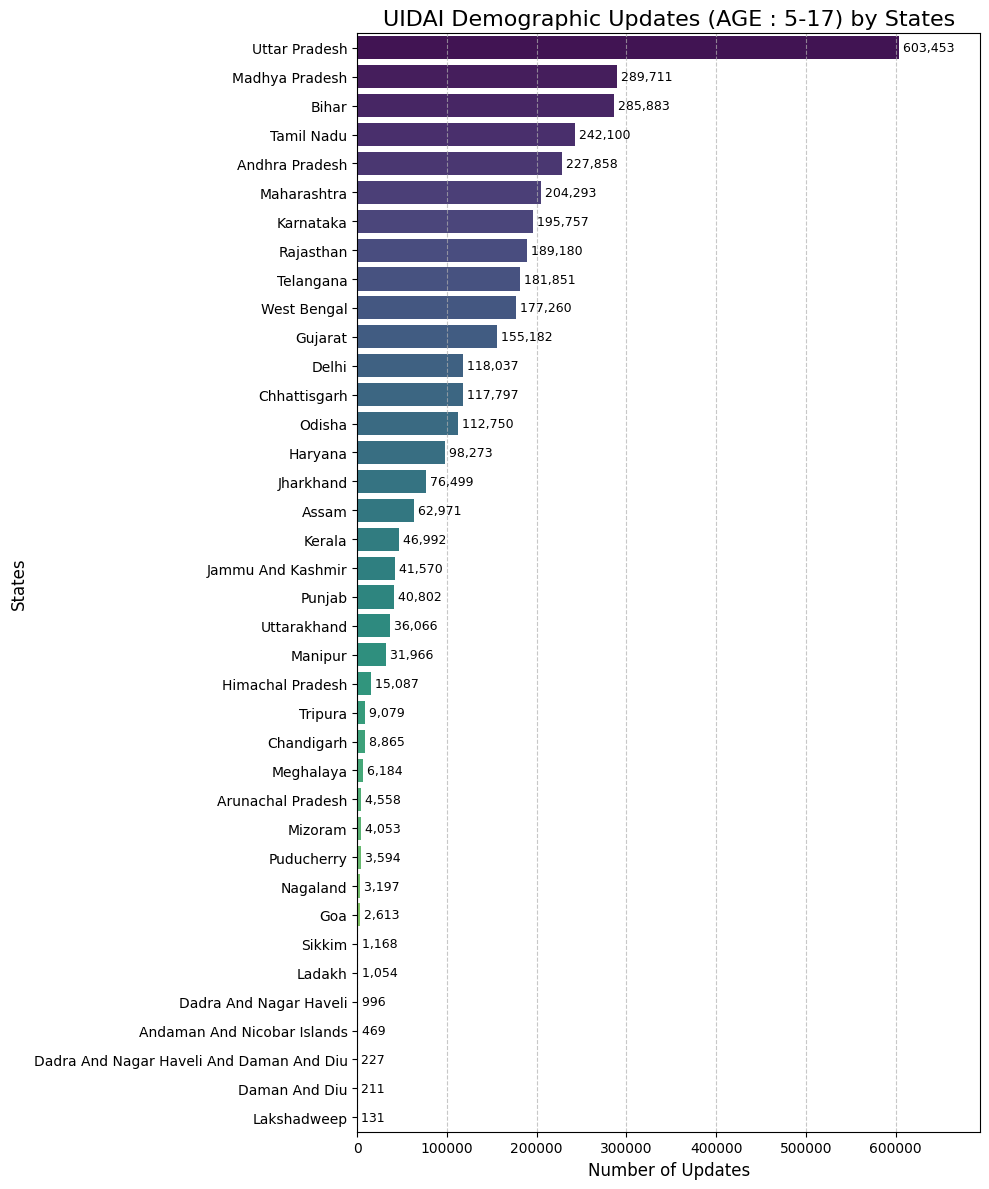

In [ ]:
df_sorted = final_df.groupby('state_clean')['demo_age_5_17'].sum().reset_index().sort_values('demo_age_5_17', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(x='demo_age_5_17', y='state_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Demographic Updates (AGE : 5-17) by States', fontsize=16)
plt.xlabel('Number of Updates', fontsize=12)
plt.ylabel('States', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['demo_age_5_17']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['demo_age_5_17'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

## states vs updates (age 18 + )

/tmp/ipython-input-1341109364.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='demo_age_17_', y='state_clean', data=df_sorted, palette='viridis')


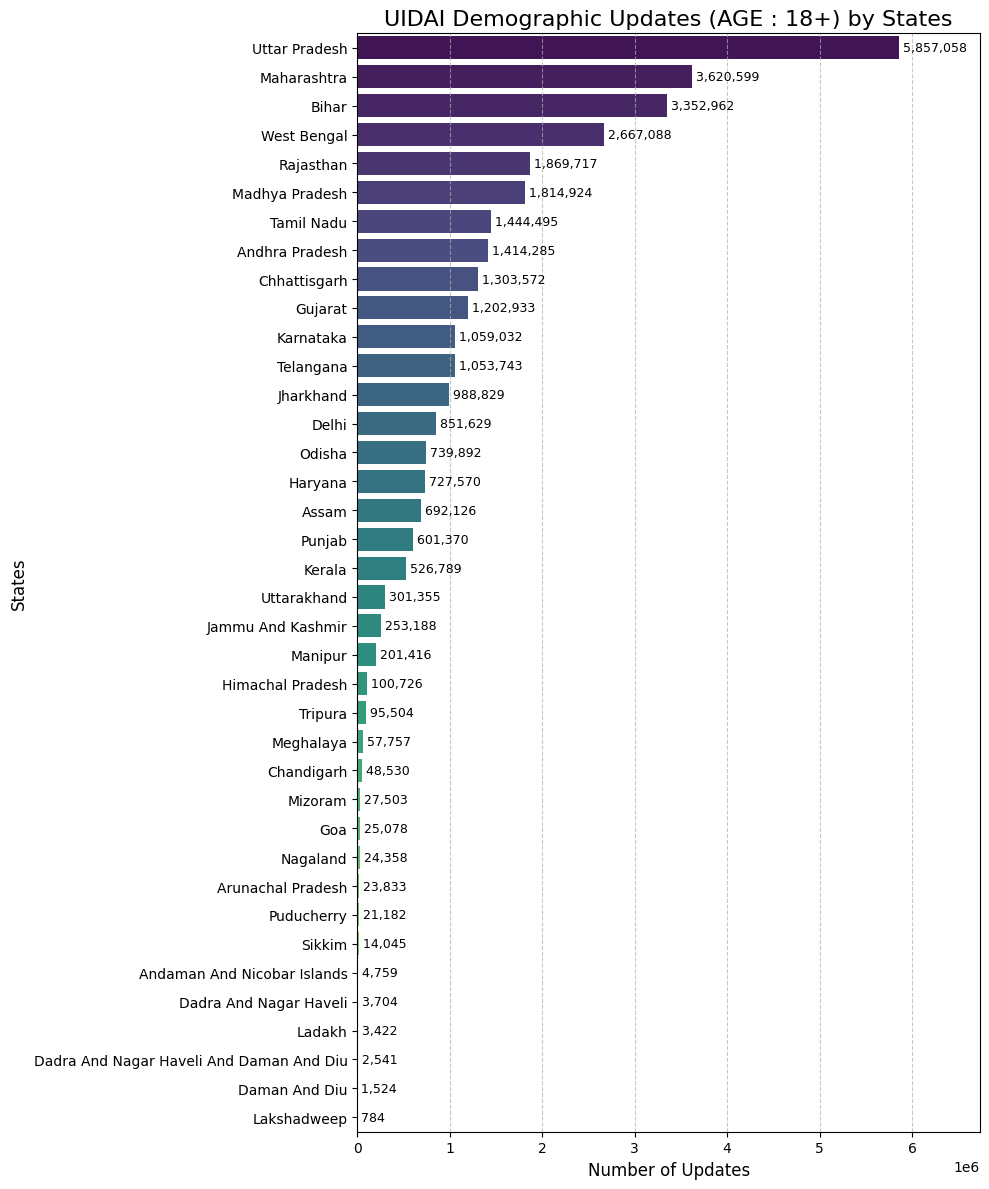

In [ ]:
df_sorted = final_df.groupby('state_clean')['demo_age_17_'].sum().reset_index().sort_values('demo_age_17_', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(x='demo_age_17_', y='state_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Demographic Updates (AGE : 18+) by States', fontsize=16)
plt.xlabel('Number of Updates', fontsize=12)
plt.ylabel('States', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['demo_age_17_']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['demo_age_17_'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

## Distrcits vs updates

                district_clean  updates
818                      Thane   326749
659                       Pune   326083
779          South 24 Parganas   300121
548                Murshidabad   263029
97                   Bengaluru   261553
806                      Surat   257237
610           North West Delhi   217905
159  Chhatrapati Sambhajinagar   213008
598          North 24 Parganas   210114
6                    Ahmedabad   204246


/tmp/ipython-input-4000610175.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='updates', y='district_clean', data=df_sorted, palette='viridis')


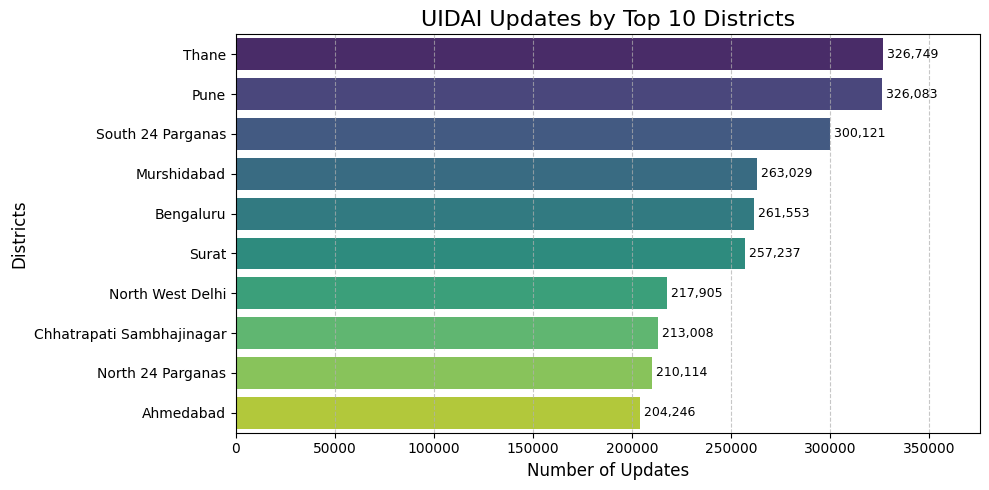

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

final_df['updates'] = final_df['demo_age_5_17'] + final_df['demo_age_17_']
df_sorted = final_df.groupby('district_clean')['updates'].sum().reset_index().sort_values('updates', ascending=False).head(10)

plt.figure(figsize=(10,5))

sns.barplot(x='updates', y='district_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Updates by Top 10 Districts', fontsize=16)
plt.xlabel('Number of Updates', fontsize=12)
plt.ylabel('Districts', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['updates']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['updates'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

In [ ]:
df_sorted

,district_clean,updates
818,Thane,326749
659,Pune,326083
779,South 24 Parganas,300121
548,Murshidabad,263029
97,Bengaluru,261553
...,...,...
839,Tiruvarur,1
526,Medchalâmalkajgiri,1
851,Udupi,1
105,Bhadrak(R),1


## distrcis vs update (age 5-17)

/tmp/ipython-input-3640079370.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='demo_age_5_17', y='district_clean', data=df_sorted, palette='viridis')


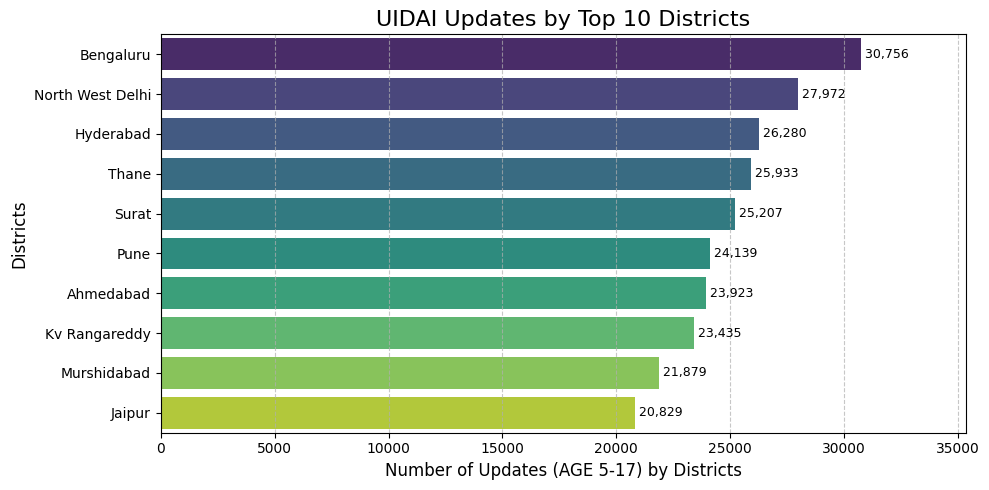

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_sorted = final_df.groupby('district_clean')['demo_age_5_17'].sum().reset_index().sort_values('demo_age_5_17', ascending=False).head(10)

plt.figure(figsize=(10,5))

sns.barplot(x='demo_age_5_17', y='district_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Updates by Top 10 Districts', fontsize=16)
plt.xlabel('Number of Updates (AGE 5-17) by Districts', fontsize=12)
plt.ylabel('Districts', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['demo_age_5_17']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['demo_age_5_17'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

In [ ]:
df_sorted = final_df.groupby('district_clean')['demo_age_5_17'].sum().reset_index().sort_values('demo_age_5_17', ascending=False)
df_sorted

,district_clean,demo_age_5_17
97,Bengaluru,30756
610,North West Delhi,27972
318,Hyderabad,26280
818,Thane,25933
806,Surat,25207
...,...,...
62,Bally Jagachha,0
851,Udupi,0
531,Mohali,0
526,Medchalâmalkajgiri,0


## districts vs updates age(18+)

/tmp/ipython-input-2951996896.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='demo_age_17_', y='district_clean', data=df_sorted, palette='viridis')


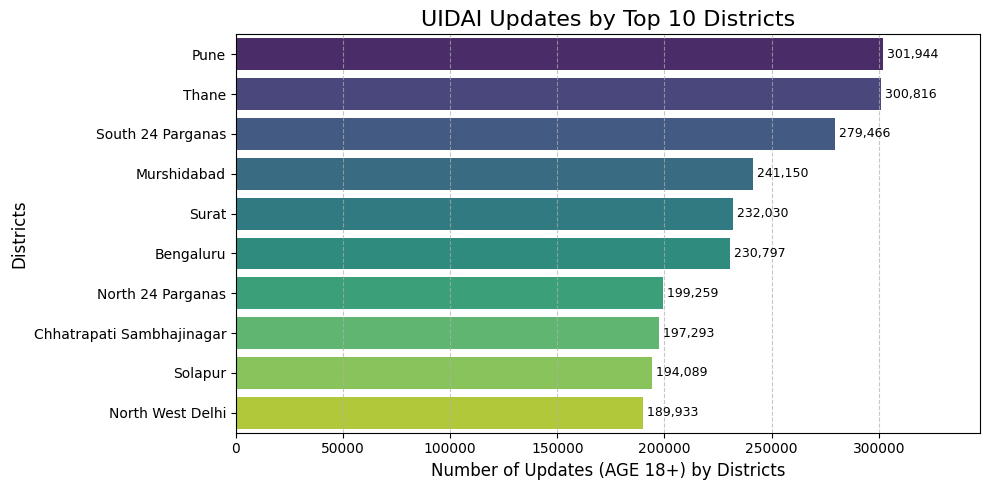

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_sorted = final_df.groupby('district_clean')['demo_age_17_'].sum().reset_index().sort_values('demo_age_17_', ascending=False).head(10)

plt.figure(figsize=(10,5))

sns.barplot(x='demo_age_17_', y='district_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Updates by Top 10 Districts', fontsize=16)
plt.xlabel('Number of Updates (AGE 18+) by Districts', fontsize=12)
plt.ylabel('Districts', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['demo_age_17_']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['demo_age_17_'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

In [ ]:
df_sorted = final_df.groupby('district_clean')['demo_age_17_'].sum().reset_index().sort_values('demo_age_17_', ascending=False)
df_sorted

,district_clean,demo_age_17_
659,Pune,301944
818,Thane,300816
779,South 24 Parganas,279466
548,Murshidabad,241150
806,Surat,232030
...,...,...
583,Near Dhyana Ashram,1
584,Near Meera Hospital,1
167,Chitrakoot,1
1,5Th Cross,1


## month wise trend analysis:

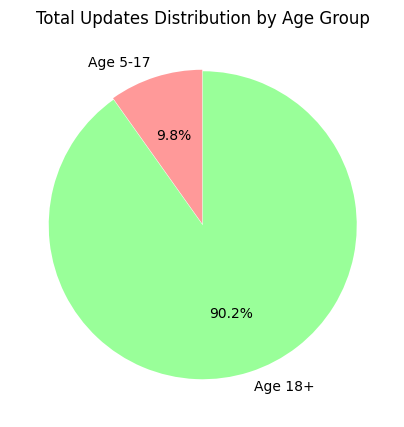

In [ ]:
import matplotlib.pyplot as plt

total_5_18 = final_df['demo_age_5_17'].sum()
total_18_above = final_df['demo_age_17_'].sum()

labels = ['Age 5-17', 'Age 18+']
sizes = [total_5_18, total_18_above]
colors = ['#ff9999', '#99ff99']

plt.figure(figsize=(5, 5))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.005, 0.005)
)

plt.title('Total Updates Distribution by Age Group')
plt.show()

## RO wise analysis

In [ ]:
# source : https://uidai.gov.in/en/contact-support/regional-offices.html
# 1. Define the Mapping (State -> Region)
zonal_mapping = {
    # RO Bengaluru
    'Karnataka': 'RO Bengaluru',
    'Kerala': 'RO Bengaluru',
    'Tamil Nadu': 'RO Bengaluru',
    'Puducherry': 'RO Bengaluru',
    'Lakshadweep': 'RO Bengaluru',

    # RO Chandigarh
    'Punjab': 'RO Chandigarh',
    'Haryana': 'RO Chandigarh',
    'Himachal Pradesh': 'RO Chandigarh',
    'Chandigarh': 'RO Chandigarh',
    'Jammu And Kashmir': 'RO Chandigarh',
    'Ladakh': 'RO Chandigarh',

    # RO Delhi
    'Delhi': 'RO Delhi',
    'Rajasthan': 'RO Delhi',
    'Uttarakhand': 'RO Delhi',
    'Madhya Pradesh': 'RO Delhi',

    # RO Guwahati
    'Assam': 'RO Guwahati',
    'Arunachal Pradesh': 'RO Guwahati',
    'Meghalaya': 'RO Guwahati',
    'Manipur': 'RO Guwahati',
    'Nagaland': 'RO Guwahati',
    'Mizoram': 'RO Guwahati',
    'Tripura': 'RO Guwahati',
    'Sikkim': 'RO Guwahati',

    # RO Hyderabad
    'Andhra Pradesh': 'RO Hyderabad',
    'Telangana': 'RO Hyderabad',
    'Odisha': 'RO Hyderabad',
    'Chhattisgarh': 'RO Hyderabad',
    'Andaman And Nicobar Islands': 'RO Hyderabad',

    # RO Lucknow
    'Uttar Pradesh': 'RO Lucknow',

    # RO Mumbai
    'Gujarat': 'RO Mumbai',
    'Maharashtra': 'RO Mumbai',
    'Goa': 'RO Mumbai',
    'Dadra And Nagar Haveli': 'RO Mumbai',
    'Daman And Diu': 'RO Mumbai',
    'Dadra And Nagar Haveli And Daman And Diu': 'RO Mumbai', # Merged UT mapped to Mumbai

    # RO Ranchi
    'Bihar': 'RO Ranchi',
    'Jharkhand': 'RO Ranchi',
    'West Bengal': 'RO Ranchi'
}

# 2. Append the new column 'region'
# We map it from 'state_clean' as it's likely more standardized
final_df['region'] = final_df['state_clean'].map(zonal_mapping)

# Check the result
final_df['region'].value_counts()

,count
region,
RO Bengaluru,360159
RO Hyderabad,335965
RO Ranchi,230813
RO Mumbai,207324
RO Delhi,154392
RO Lucknow,132366
RO Chandigarh,100601
RO Guwahati,76479


          region  updates
7      RO Ranchi  7548521
5     RO Lucknow  6460511
2       RO Delhi  5470619
6      RO Mumbai  5219901
4   RO Hyderabad  5156976
0   RO Bengaluru  3540856
1  RO Chandigarh  1940457
3    RO Guwahati  1259718


(np.float64(-1.09999977794266),
 np.float64(1.099999942921031),
 np.float64(-1.0999984643636687),
 np.float64(1.0999999439797785))

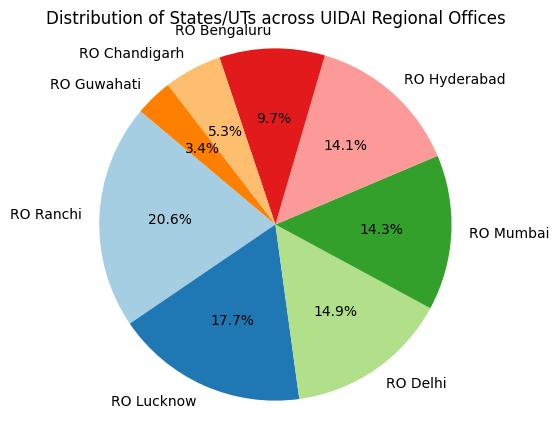

In [ ]:
zonal_counts = final_df.groupby('region')['updates'].sum().reset_index().sort_values('updates', ascending=False)
print(zonal_counts)
plt.figure(figsize=(5, 5))
colors = plt.cm.Paired(range(len(zonal_counts)))
plt.pie(zonal_counts['updates'], labels=zonal_counts['region'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of States/UTs across UIDAI Regional Offices')
plt.axis('equal')

month wise analysis

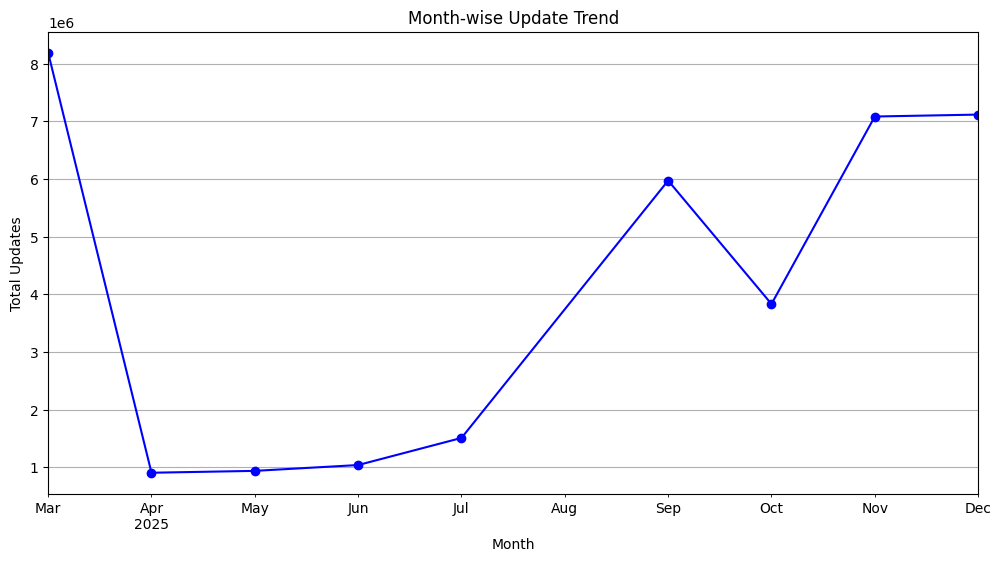

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Convert the 'date' column to real Datetime objects
# (Replace 'date' with your actual column name, e.g., 'Date' or 'Aadhaar_Date')
final_df['date'] = pd.to_datetime(final_df['date'], format='%d-%m-%Y')
# Note: If your date format is DD-MM-YYYY, use format='%d-%m-%Y'

# 2. Extract the Month and Year (e.g., "2024-01")
final_df['Month_Year'] = final_df['date'].dt.to_period('M')
final_df['updates'] = final_df['demo_age_5_17'] + final_df['demo_age_17_']

# 3. Group by this new column and sum the enrolments
monthly_data = final_df.groupby('Month_Year')['updates'].sum()

# 4. Plot the Trend
plt.figure(figsize=(12, 6))
monthly_data.plot(kind='line', marker='o', color='b') # 'line' shows trend better

plt.title('Month-wise Update Trend')
plt.xlabel('Month')
plt.ylabel('Total Updates')
plt.grid(True)
plt.show()

finding duplicates

In [ ]:
duplicate_rows = final_df[final_df.duplicated(keep=False)]
print(duplicate_rows)
print(len(duplicate_rows))
final_df.duplicated().sum()

               date           state  district  pincode  demo_age_5_17  \
113325   18-10-2025       Karnataka  Belagavi   591313              0   
113326   18-10-2025       Karnataka  Belagavi   591315              0   
113327   18-10-2025       Karnataka  Belagavi   591316              0   
113328   18-10-2025       Karnataka   Belgaum   590009              0   
113329   18-10-2025       Karnataka   Belgaum   591101              1   
...             ...             ...       ...      ...            ...   
2069815  29-12-2025  Andhra Pradesh  Cuddapah   516004              0   
2069816  29-12-2025  Andhra Pradesh  Cuddapah   516151              0   
2069817  29-12-2025  Andhra Pradesh  Cuddapah   516173              0   
2069818  29-12-2025  Andhra Pradesh  Cuddapah   516175              1   
2069819  29-12-2025  Andhra Pradesh  Cuddapah   516218              0   

         demo_age_17_     state_clean district_clean  is_duplicate  
113325              1       Karnataka       Belagavi  

np.int64(473601)

In [ ]:
final_df["is_duplicate"] = final_df.duplicated(keep="first")
final_df["is_duplicate"].value_counts()

,count
is_duplicate,
False,1598099
True,473601
